centroids:  [array([2, 3]), array([3, 3]), array([5, 4])]
0 2
new centroids:  [[1.66666667 2.        ]
 [3.         3.        ]
 [5.         4.66666667]]
1 1


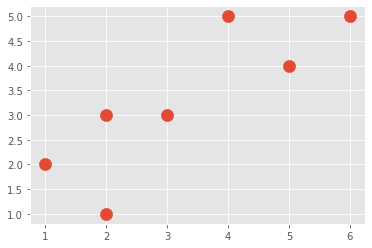

In [29]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

#import training set
my_data = np.array(pd.read_csv('mycsv.csv'))

#debug
# print("my_data: ", my_data)


def eucl_dist(A, B):
    return (sum(A-B)**2)**0.5

def assign_clusters(centroids, data):
    clusters = []
    for i in range(data.shape[0]):
        distances = []
        for cent in centroids:
            # Get euclidean distances between each centroid and each data point
            distances.append(eucl_dist(cent, data[i]))
        
        # Choose smallest distance
        clust = [z for z, val in enumerate(distances) if val==min(distances)]
        #debug
        # print(distances)
        # print(clust)
        clusters.append(clust[0])

    return clusters

# Get new centroids
def new_centroids(clusters, data):
    centroids = []
    cluster_dataframe = pd.concat([pd.DataFrame(data), pd.DataFrame(clusters,columns=['cluster'])], axis=1)

    for c in set(cluster_dataframe['cluster']):
        temp_cluster = cluster_dataframe[cluster_dataframe['cluster']==c][cluster_dataframe.columns[:-1]]
        cluster_mean = temp_cluster.mean(axis=0)
        centroids.append(cluster_mean)
    return centroids


# Calculate sum of square variance
def sse(clusters, data):
    ss = []
    cluster_dataframe = pd.concat([pd.DataFrame(data), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_dataframe['cluster']):
        temp_cluster = cluster_dataframe[cluster_dataframe['cluster']==c][cluster_dataframe.columns[:-1]]
        cluster_mean = temp_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, temp_cluster.shape[0],1) # put mean in all positions
        ss.append(np.sum(np.sum((temp_cluster - mean_repmat)**2))) # subtract mean from all positions and do sum of squares
    return ss


if __name__ == '__main__':
    # initial centroids as per assignment
    centroids = [np.array(i) for i in [[2,3], [3,3], [5,4]]]
    #debug
    print("centroids: ", centroids)
    cluster_vars = []

    clusters = assign_clusters(centroids, my_data)

    initial_clusters = clusters
    print(0, round(np.mean(sse(clusters,my_data))))

    # for i in range(1):
    centroids = new_centroids(clusters, my_data)
    print("new centroids: ", np.array(centroids))
    clusters = assign_clusters(centroids, my_data)
    clustvar = np.mean(sse(clusters, my_data))
    cluster_vars.append(clustvar)
    print(i+1, round(clustvar))


    plt.scatter(my_data[:,0], my_data[:,1], s=150)
    # plt.savefig("plot.png")
    plt.show()

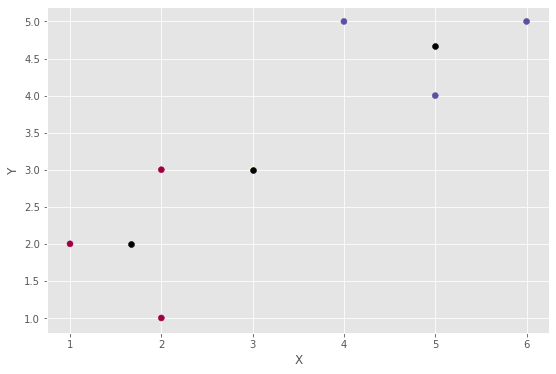

In [30]:
plt.subplots(figsize=(9,6))
plt.scatter(x=my_data[:,0], y=my_data[:,1], c=initial_clusters, cmap=plt.cm.Spectral);
cent = np.array(centroids)
plt.scatter(x=cent[:,0], y=cent[:,1], c='black') # show centroids
plt.xlabel('X')
plt.ylabel('Y');
# plt.savefig('initial_clusters', bpi=150)

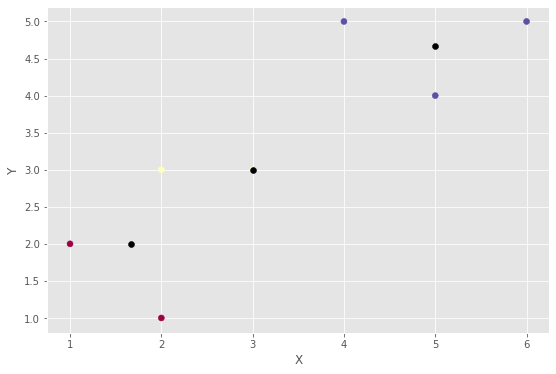

In [32]:
plt.subplots(figsize=(9,6))
plt.scatter(x=my_data[:,0], y=my_data[:,1], c=clusters, cmap=plt.cm.Spectral);
cent = np.array(centroids)
plt.scatter(x=cent[:,0], y=cent[:,1], c='black') # show centroids
plt.xlabel('X')
plt.ylabel('Y');
# plt.savefig('final_clusters', bpi=150)